In [8]:
from ultralytics import YOLO
model = YOLO('./ultralytics/cfg/models/v8/yolov8n_ECA.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1         3  ultralytics.nn.modules.conv.ECAAttention     [32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  6                  -1  1         3  ultralytics.nn.modules.conv.ECAAttention     [64]                          
  7                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64,

In [6]:
! python start_train.py --model ./ultralytics/cfg/models/v8/yolov8n_ECA.yaml --data_dir C:/Users/RUWITONZE/Pictures/yolo/dataset/data.yaml


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1         3  ultralytics.nn.modules.conv.ECAAttention     [32]                          
  4                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  5                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  6                  -1  1         3  ultralytics.nn.modules.conv.ECAAttention     [64]                          
  7                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64,

In [2]:
import torch

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")  # True = GPU detected

if torch.cuda.is_available():
    print(f"GPU Device Name: {torch.cuda.get_device_name(0)}")
    print(f"Total GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print("No NVIDIA GPU detected or CUDA drivers not installed")

PyTorch Version: 2.7.0+cpu
CUDA Available: False
No NVIDIA GPU detected or CUDA drivers not installed


In [3]:
! nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv(r"C:\Users\RUWITONZE\Pictures\yolo\results.csv")
df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,14.410,4.1624,4.2153,0.00248,0.50564,0.00394,0.00131,10.391,4.2691,4.1871,0.000325,0.000325,0.000325
1,1,13.894,3.8705,4.0401,0.00249,0.51395,0.00579,0.00194,11.414,4.2559,4.1290,0.000651,0.000651,0.000651
2,0,14.410,4.1624,4.2153,0.00248,0.50564,0.00394,0.00131,10.391,4.2691,4.1871,0.000325,0.000325,0.000325
3,2,12.507,3.6459,3.7539,0.00343,0.48828,0.04954,0.01650,12.972,4.6656,4.2197,0.000972,0.000972,0.000972
4,1,13.894,3.8705,4.0401,0.00249,0.51395,0.00579,0.00194,11.414,4.2559,4.1290,0.000651,0.000651,0.000651


In [5]:
df.duplicated().sum()

np.int64(49)

In [6]:
df.shape

(99, 14)

In [ ]:
df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
df.columns[1:]

13

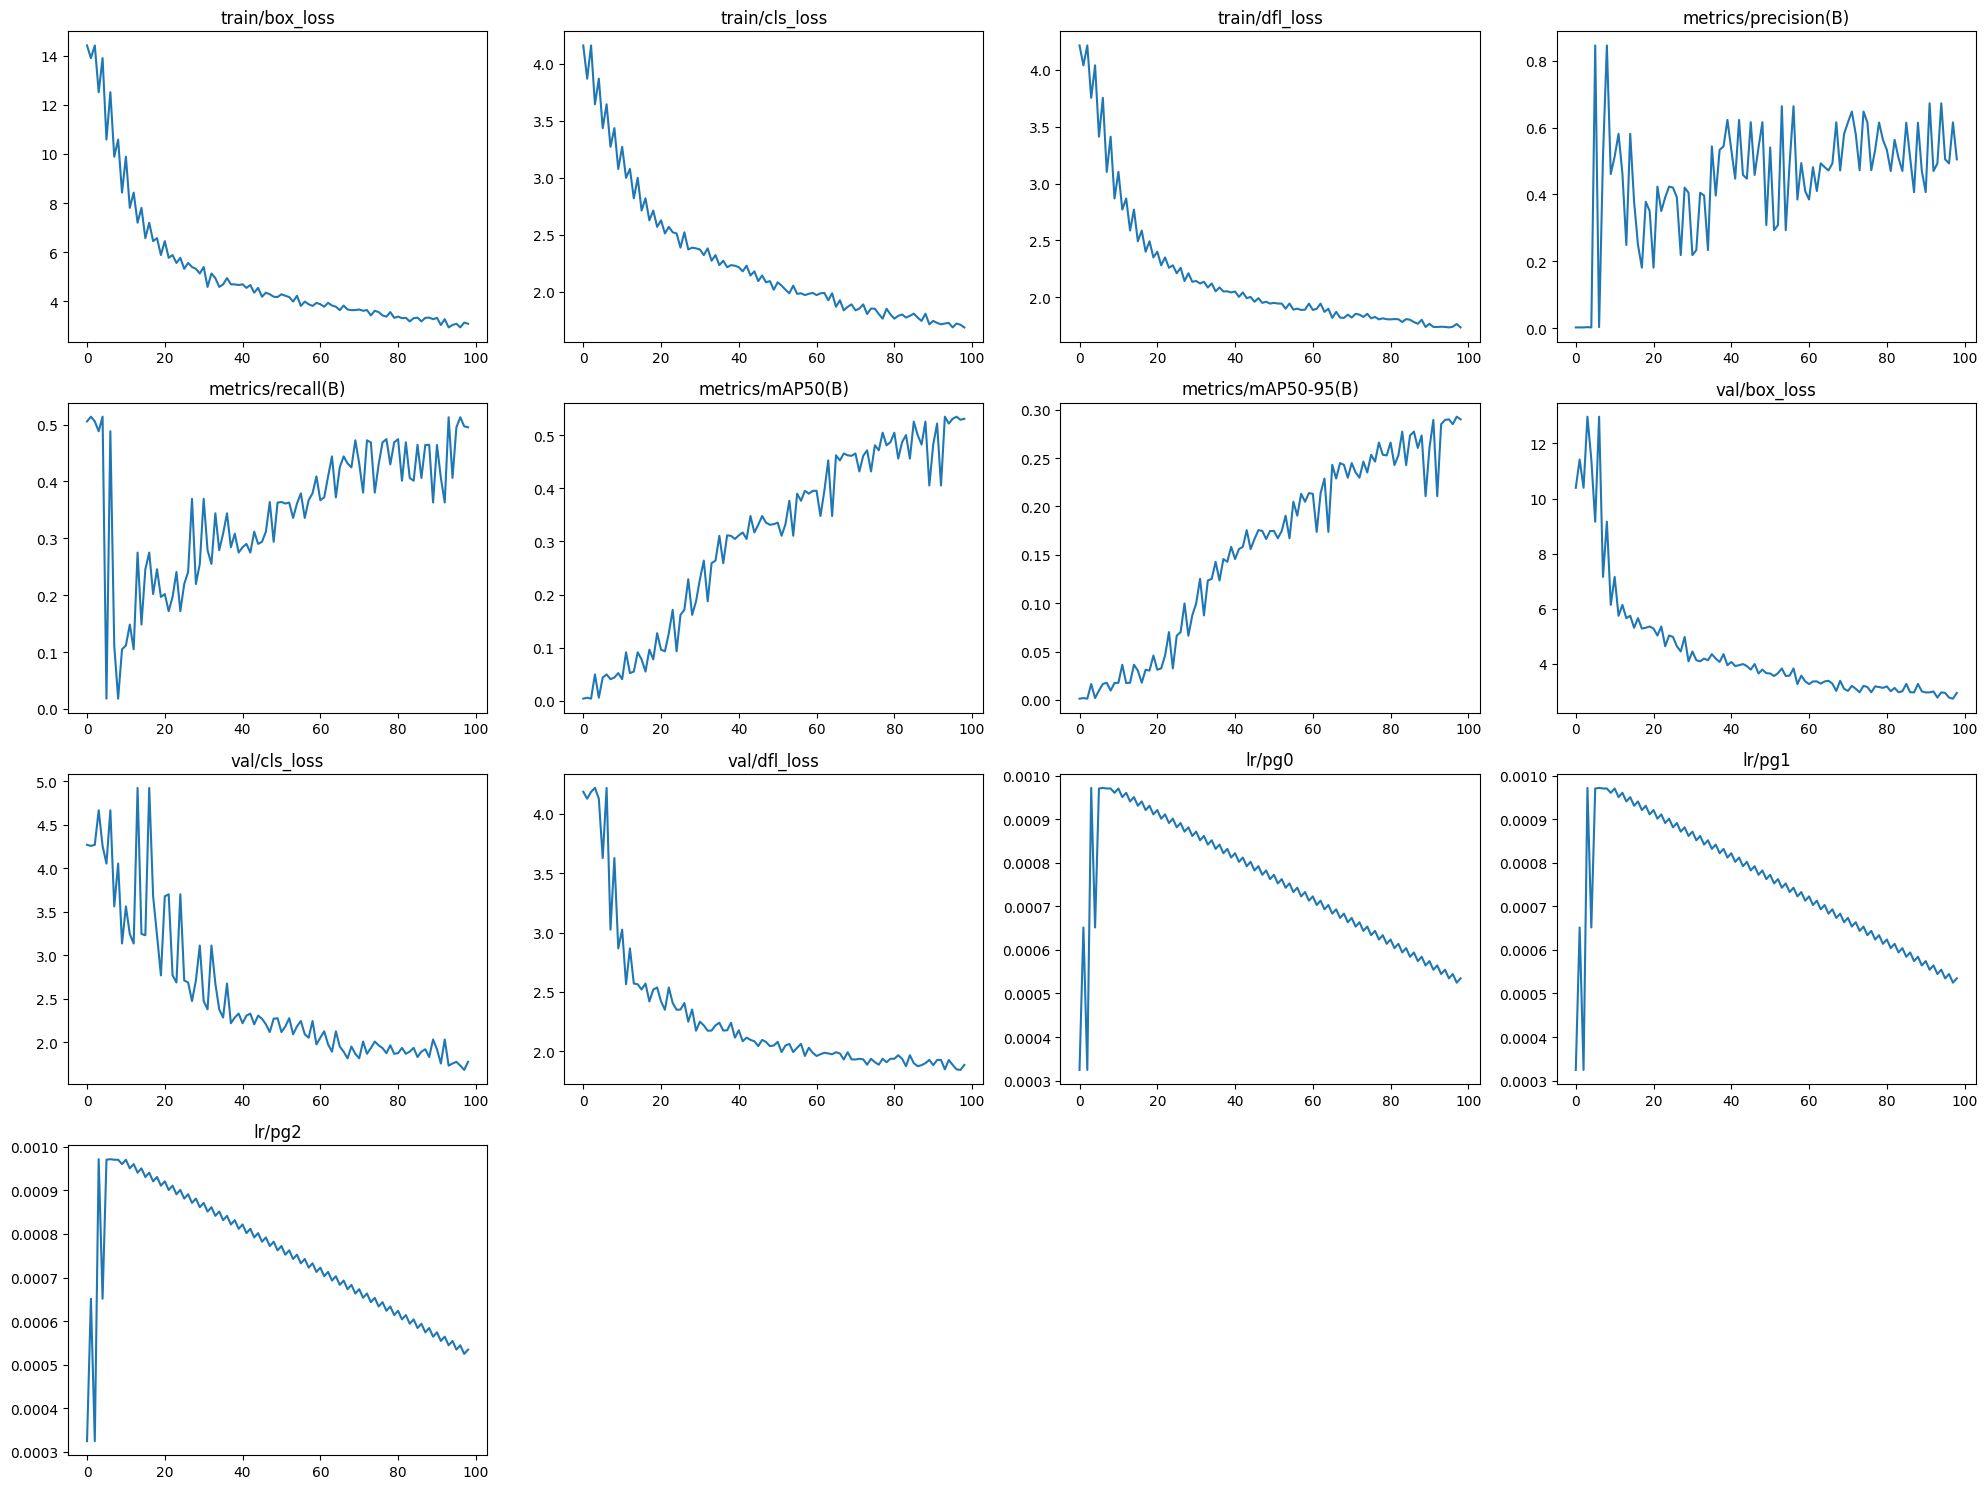

In [ ]:

# Create a 4x4 subplot grid (to fit 14 subplots nicely with some empty space)
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

# Plot each of the 14 series
for i, col in enumerate(df.columns[1:]):
    df[col].plot(ax=axes[i])
    axes[i].set_title(col.strip())

# Hide the last 2 empty subplots
for j in range(13, 16):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
